In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [4]:
Facturacion = pd.read_csv("Facturacion_centro.csv",encoding = "ISO-8859-1")
Facturacion.columns = ['Orden', 'Tipo', 'Fecha', 'Mes', 'Año', 'Clase', 'CEBE', 'UN', 'SUC', 'LN', 'Centro']

Meses = ['Enero', 'Febrero', 'Marzo', 'Abril',
         'Mayo', 'Junio', 'Julio', 'Agosto',
         'Septiembre', 'Octubre','Noviembre', 'Diciembre']

Facturacion.head()

# UN = Servicio liviano para todos, Columna redundante

,Orden,Tipo,Fecha,Mes,Año,Clase,CEBE,UN,SUC,LN,Centro
0,19121033,ZSGR,14-03-2019,3,2019,Orden de Servicio Garantia Liviano,10ROSL10,Servicio Liviano,Rondizzoni,SL GM Taller,Santiago Rondizzoni
1,19121038,ZSGR,20-04-2020,4,2020,Orden de Servicio Garantia Liviano,10CASL10,Servicio Liviano,Calama,SL GM Taller,Calama
2,19121039,ZSGR,21-02-2019,2,2019,Orden de Servicio Garantia Liviano,10ANSL10,Servicio Liviano,Antofagasta,SL GM Taller,Antofagasta
3,19121045,ZSGR,14-02-2019,2,2019,Orden de Servicio Garantia Liviano,10MNSL10,Servicio Liviano,Mall Plaza Norte,SL GM Taller,Santiago Mall Plaza Norte
4,19121050,ZSGR,14-02-2019,2,2019,Orden de Servicio Garantia Liviano,10ROSL30,Servicio Liviano,Rondizzoni,SL GM Camiones,Santiago Rondizzoni


Esto es la cantidad de variables distintas que contiene cada columna

In [18]:
Facturacion['Clase'].unique()

array(['Orden de Servicio Garantia Liviano',
       'Orden de Servicio Reparacion Liviano'], dtype=object)

In [19]:
Facturacion['Año'].unique()

array([2019, 2020, 2018], dtype=int64)

In [22]:
Facturacion['SUC'].unique()

array(['Rondizzoni', 'Calama', 'Antofagasta', 'Mall Plaza Norte',
       'Temuco', 'Copiapo', 'La Serena', 'Concepci¢n', 'Iquique', 'Buin',
       'Vespucio', 'Alto Hospicio', 'Ossa', 'Ruta 68'], dtype=object)

In [23]:
Facturacion['LN'].unique()

array(['SL GM Taller', 'SL GM Camiones', 'SL SK Taller', 'SL GM Tapide',
       'SL GM Pre-Entrega', 'SL Nissan Taller', 'SL GM Taller para RAC'],
      dtype=object)

In [24]:
Facturacion['Centro'].unique()

array(['Santiago Rondizzoni', 'Calama', 'Antofagasta',
       'Santiago Mall Plaza Norte', 'Temuco', 'Copiap¢', 'La Serena',
       'Concepci¢n', 'Iquique', 'Santiago Paine', 'Calama S. Pesado',
       'Santiago Vespucio', 'Iquique Alto Hospicio', 'La Serena Norte',
       'Santiago Ossa', 'Santiago Ruta 68'], dtype=object)

In [25]:
Facturacion['Tipo'].unique()

array(['ZSGR', 'ZSRL'], dtype=object)

In [26]:
Facturacion['CEBE'].unique()

array(['10ROSL10', '10CASL10', '10ANSL10', '10MNSL10', '10ROSL30',
       '10ANSK10', '10TESL10', '10CPSL10', '10LSSL10', '10CCSL10',
       '10CASK10', '10IQSL10', '10BUSL10', '10ROSL20', '10CPSL20',
       '10CCSL20', '10ANSL20', '10AVSL30', '10CPSL30', '10LSSL20',
       '10AHSL10', '10CASL20', '10IQSL30', '10CASL40', '10AVSL10',
       '10IQNS10', '10CASL30', '10CANS10', '10ANNS10', '10ROSL50',
       '10ANSL50', '10BUSL50', '10CPSL50', '10ANSL30', '10OSSL10',
       '10CCSL30', '10LSSL30', '10IQSL20', '10CCSL40', '10RUSL10',
       '10RUSL30', '10CASL50', '10AHSL50', '10CCSL50', '10RUSL50',
       '10TESL50', '10LSSL50', '10IQSL50'], dtype=object)

In [5]:
# SE ARREGLA LA INCONSISTENCIA DE FORMATO DE FECHAS EN 11-01-1999 y 11/01/1999 y SE DEJA COMO  11-01-1999.
Facturacion['Fecha'] = Facturacion['Fecha'].str.replace('/','-')
Facturacion['SUC'] = Facturacion['SUC'].str.replace('¢','o')
Facturacion['Centro'] = Facturacion['Centro'].str.replace('¢','o')
# SE CREAN DATAFRAMES SEGUN SUCURSAL

Suc_Rondizzoni = Facturacion.loc[Facturacion['SUC'] == 'Rondizzoni']
# Suc. Rondizzoni tiene Centro: Santaigo Rondizzoni, Calama S. Pesado, Santiago Mall Plaza Norte, La Serena, Santiago Vespucio
Suc_Calama = Facturacion.loc[Facturacion['SUC'] == 'Calama']
# Suc. Calama tiene Centro: Calama, Calama S. Pesado
Suc_Antofagasta = Facturacion.loc[Facturacion['SUC'] == 'Antofagasta']
# Suc. Antofagasta tiene Centro: Antofagasta, La Serena, Santiago Rondizzoni
Suc_MPN = Facturacion.loc[Facturacion['SUC'] == 'Mall Plaza Norte']
# Suc. Mall Plaza Norte tiene Centro: Santiago Mall Plaza Norte
Suc_Temuco = Facturacion.loc[Facturacion['SUC'] == 'Temuco']
# Centro: Temuco
Suc_Copiapo = Facturacion.loc[Facturacion['SUC'] == 'Copiapo']
# Centro: Copiapo, Santiago Rondizzoni
Suc_Serena = Facturacion.loc[Facturacion['SUC'] == 'La Serena']
# Centro: La Serena, La Serena Norte
Suc_Concepcion = Facturacion.loc[Facturacion['SUC'] == 'Concepcion']
# Centro: Concepcion
Suc_Iquique = Facturacion.loc[Facturacion['SUC'] == 'Iquique']
# Centro: Iquique
Suc_Buin = Facturacion.loc[Facturacion['SUC'] == 'Buin']
# Centro: Santaigo Paine, Santiago Rondizzoni
Suc_Vespucio = Facturacion.loc[Facturacion['SUC'] == 'Vespucio']
# Centro: Santiago Vespucio, Copiapo, Santiago Ruta 68
Suc_Alto = Facturacion.loc[Facturacion['SUC'] == 'Alto Hospicio']
# Centro: Iquique Alto Hospicio, Iquique
Suc_Ossa = Facturacion.loc[Facturacion['SUC'] == 'Ossa']
# Centro: Santiago Ossa

Hay que clarificar que es Sucursal y Centro dado que una Sucursal tiene mas de un centro asociado y además mas de una sucursal tiene contienen el mismo centro.

In [47]:
meses_colors = ['#78C850',  # Enero
                '#F08030',  # Febrero
                '#6890F0',  # Marzo
                '#A8B820',  # Abril
                '#A8A878',  # Mayo
                '#A040A0',  # Junio
                '#F8D030',  # Julio
                '#E0C068',  # Agosto
                '#EE99AC',  # Septiembre
                '#C03028',  # Octubre
                '#F85888',  # Noviembre
                '#B8A038',  # Diciembre
                   ]

Text(0.5, 1.0, 'OT Reparación Rondizzoni 2020')

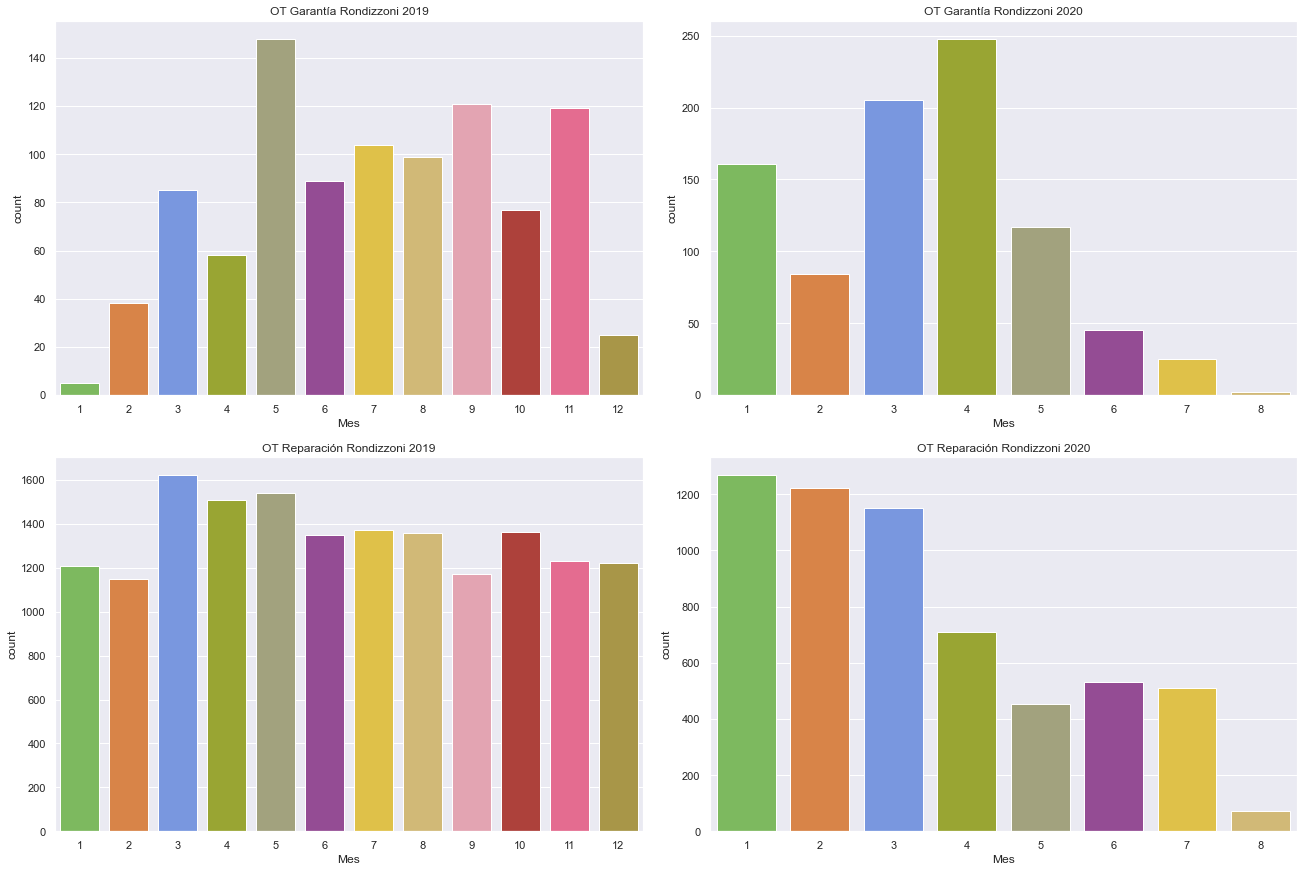

In [50]:
# Clasificacion por orden de sericio : 'Orden de Servicio Garantia Liviano' y 'Orden de Servicio Reparacion Liviano'
Rondizzoni_Garantia = Suc_Rondizzoni.loc[Suc_Rondizzoni['Clase'] == 'Orden de Servicio Garantia Liviano']
Rondizzoni_Reparacion = Suc_Rondizzoni.loc[Suc_Rondizzoni['Clase'] == 'Orden de Servicio Reparacion Liviano']

# NOMENCLATURA R= RONDIZZONI; G = GARANTIA, R = REPARACION; AÑO
RG19 = Rondizzoni_Garantia.loc[Rondizzoni_Garantia['Año'] == 2019]
RG20 = Rondizzoni_Garantia.loc[Rondizzoni_Garantia['Año'] == 2020]

RR19 = Rondizzoni_Reparacion.loc[Rondizzoni_Reparacion['Año'] == 2019]
RR20 = Rondizzoni_Reparacion.loc[Rondizzoni_Reparacion['Año'] == 2020]

sns.set(rc={'figure.figsize':(18,12)})

fig3 = plt.figure(constrained_layout=True)
spec3 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig3)
f3_ax1 = fig3.add_subplot(spec3[0, 0])
f3_ax2 = fig3.add_subplot(spec3[0, 1])
f3_ax3 = fig3.add_subplot(spec3[1, 0])
f3_ax4 = fig3.add_subplot(spec3[1, 1])


sns.countplot(x='Mes',data=RG19, palette=meses_colors, ax=f3_ax1).set_title("OT Garantía Rondizzoni 2019")
sns.countplot(x='Mes',data=RG20, palette=meses_colors, ax=f3_ax2).set_title("OT Garantía Rondizzoni 2020")
sns.countplot(x='Mes',data=RR19, palette=meses_colors, ax=f3_ax3).set_title("OT Reparación Rondizzoni 2019")
sns.countplot(x='Mes',data=RR20, palette=meses_colors, ax=f3_ax4).set_title("OT Reparación Rondizzoni 2020")

Text(0.5, 1.0, 'OT Reparación Calama 2020')

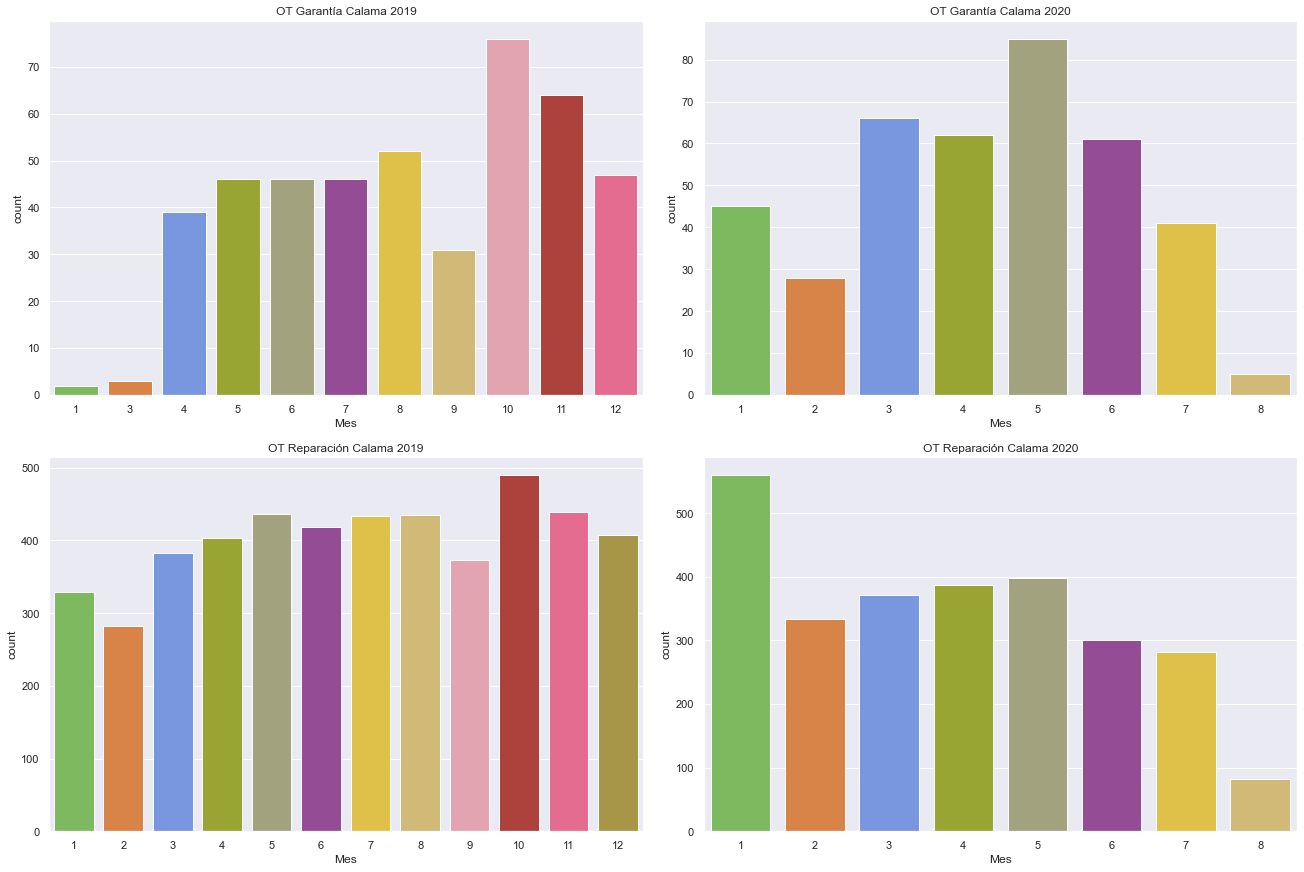

In [51]:
# Clasificacion por orden de sericio : 'Orden de Servicio Garantia Liviano' y 'Orden de Servicio Reparacion Liviano'
Calama_Garantia = Suc_Calama.loc[Suc_Calama['Clase'] == 'Orden de Servicio Garantia Liviano']
Calama_Reparacion = Suc_Calama.loc[Suc_Calama['Clase'] == 'Orden de Servicio Reparacion Liviano']


CG19 = Calama_Garantia.loc[Calama_Garantia['Año'] == 2019]
CG20 = Calama_Garantia.loc[Calama_Garantia['Año'] == 2020]

CR19 = Calama_Reparacion.loc[Calama_Reparacion['Año'] == 2019]
CR20 = Calama_Reparacion.loc[Calama_Reparacion['Año'] == 2020]

sns.set(rc={'figure.figsize':(18,12)})

fig3 = plt.figure(constrained_layout=True)
spec3 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig3)
f3_ax1 = fig3.add_subplot(spec3[0, 0])
f3_ax2 = fig3.add_subplot(spec3[0, 1])
f3_ax3 = fig3.add_subplot(spec3[1, 0])
f3_ax4 = fig3.add_subplot(spec3[1, 1])


sns.countplot(x='Mes',data=CG19, palette=meses_colors, ax=f3_ax1).set_title("OT Garantía Calama 2019")
sns.countplot(x='Mes',data=CG20, palette=meses_colors, ax=f3_ax2).set_title("OT Garantía Calama 2020")
sns.countplot(x='Mes',data=CR19, palette=meses_colors, ax=f3_ax3).set_title("OT Reparación Calama 2019")
sns.countplot(x='Mes',data=CR20, palette=meses_colors, ax=f3_ax4).set_title("OT Reparación Calama 2020")

Text(0.5, 1.0, 'OT Reparación Antofagasta 2020')

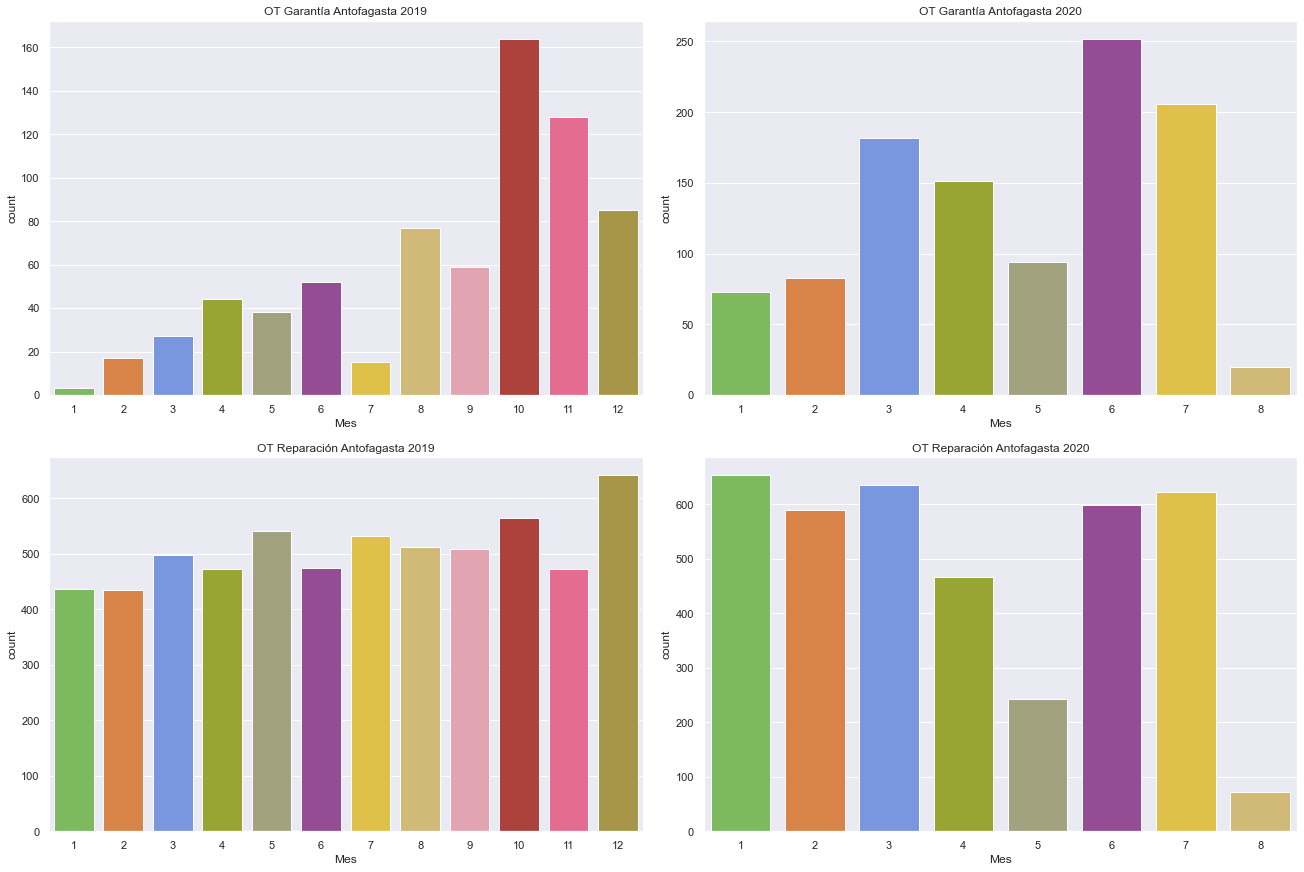

In [52]:
# Clasificacion por orden de sericio : 'Orden de Servicio Garantia Liviano' y 'Orden de Servicio Reparacion Liviano'
Antofagasta_Garantia = Suc_Antofagasta.loc[Suc_Antofagasta['Clase'] == 'Orden de Servicio Garantia Liviano']
Antofagasta_Reparacion = Suc_Antofagasta.loc[Suc_Antofagasta['Clase'] == 'Orden de Servicio Reparacion Liviano']


AG19 = Antofagasta_Garantia.loc[Antofagasta_Garantia['Año'] == 2019]
AG20 = Antofagasta_Garantia.loc[Antofagasta_Garantia['Año'] == 2020]

AR19 = Antofagasta_Reparacion.loc[Antofagasta_Reparacion['Año'] == 2019]
AR20 = Antofagasta_Reparacion.loc[Antofagasta_Reparacion['Año'] == 2020]

sns.set(rc={'figure.figsize':(18,12)})

fig3 = plt.figure(constrained_layout=True)
spec3 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig3)
f3_ax1 = fig3.add_subplot(spec3[0, 0])
f3_ax2 = fig3.add_subplot(spec3[0, 1])
f3_ax3 = fig3.add_subplot(spec3[1, 0])
f3_ax4 = fig3.add_subplot(spec3[1, 1])


sns.countplot(x='Mes',data=AG19, palette=meses_colors, ax=f3_ax1).set_title("OT Garantía Antofagasta 2019")
sns.countplot(x='Mes',data=AG20, palette=meses_colors, ax=f3_ax2).set_title("OT Garantía Antofagasta 2020")
sns.countplot(x='Mes',data=AR19, palette=meses_colors, ax=f3_ax3).set_title("OT Reparación Antofagasta 2019")
sns.countplot(x='Mes',data=AR20, palette=meses_colors, ax=f3_ax4).set_title("OT Reparación Antofagasta 2020")

Text(0.5, 1.0, 'OT Reparación MPN 2020')

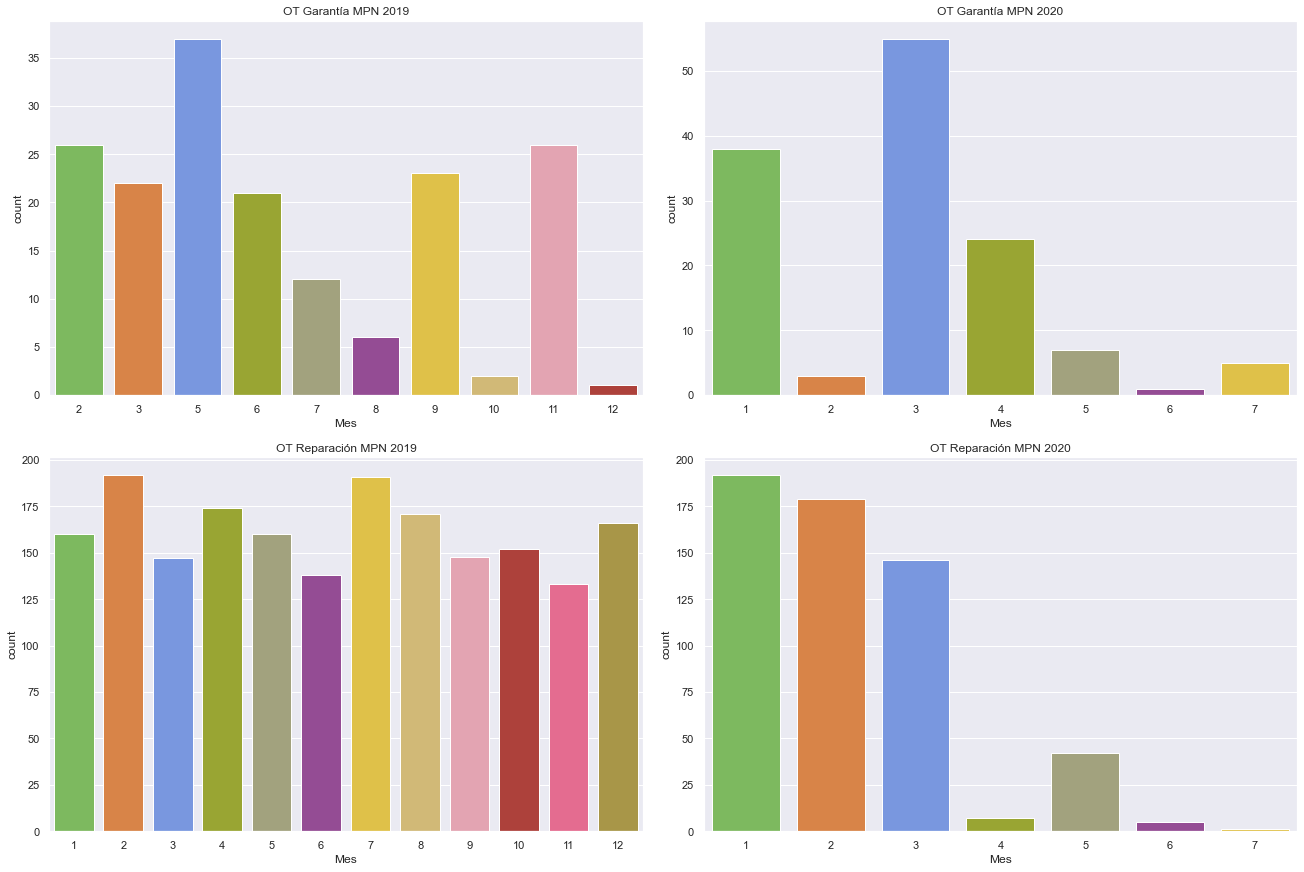

In [53]:
# Clasificacion por orden de sericio : 'Orden de Servicio Garantia Liviano' y 'Orden de Servicio Reparacion Liviano'
MPN_Garantia = Suc_MPN.loc[Suc_MPN['Clase'] == 'Orden de Servicio Garantia Liviano']
MPN_Reparacion = Suc_MPN.loc[Suc_MPN['Clase'] == 'Orden de Servicio Reparacion Liviano']


MPNG19 = MPN_Garantia.loc[MPN_Garantia['Año'] == 2019]
MPNG20 = MPN_Garantia.loc[MPN_Garantia['Año'] == 2020]

MPNR19 = MPN_Reparacion.loc[MPN_Reparacion['Año'] == 2019]
MPNR20 = MPN_Reparacion.loc[MPN_Reparacion['Año'] == 2020]

sns.set(rc={'figure.figsize':(18,12)})

fig3 = plt.figure(constrained_layout=True)
spec3 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig3)
f3_ax1 = fig3.add_subplot(spec3[0, 0])
f3_ax2 = fig3.add_subplot(spec3[0, 1])
f3_ax3 = fig3.add_subplot(spec3[1, 0])
f3_ax4 = fig3.add_subplot(spec3[1, 1])


sns.countplot(x='Mes',data=MPNG19, palette=meses_colors, ax=f3_ax1).set_title("OT Garantía MPN 2019")
sns.countplot(x='Mes',data=MPNG20, palette=meses_colors, ax=f3_ax2).set_title("OT Garantía MPN 2020")
sns.countplot(x='Mes',data=MPNR19, palette=meses_colors, ax=f3_ax3).set_title("OT Reparación MPN 2019")
sns.countplot(x='Mes',data=MPNR20, palette=meses_colors, ax=f3_ax4).set_title("OT Reparación MPN 2020")

In [7]:
# Clasificacion por año  para rondizzoni

RG18 = Rondizzoni_Garantia.loc[Rondizzoni_Garantia['Año'] == 2018]
RG19 = Rondizzoni_Garantia.loc[Rondizzoni_Garantia['Año'] == 2019]
RG20 = Rondizzoni_Garantia.loc[Rondizzoni_Garantia['Año'] == 2020]

# Clasificacion por mes

RG19_1 = RG19.loc[RG19['Mes'] == 1]
RG19_2 = RG19.loc[RG19['Mes'] == 2]
RG19_3 = RG19.loc[RG19['Mes'] == 3]
RG19_4 = RG19.loc[RG19['Mes'] == 4]
RG19_5 = RG19.loc[RG19['Mes'] == 5]
RG19_6 = RG19.loc[RG19['Mes'] == 6]
RG19_7 = RG19.loc[RG19['Mes'] == 7]
RG19_8 = RG19.loc[RG19['Mes'] == 8]
RG19_9 = RG19.loc[RG19['Mes'] == 9]
RG19_10 = RG19.loc[RG19['Mes'] == 10]
RG19_11 = RG19.loc[RG19['Mes'] == 11]
RG19_12 = RG19.loc[RG19['Mes'] == 12]

Meses = ['Enero', 'Febrero', 'Marzo', 'Abril',
         'Mayo', 'Junio', 'Julio', 'Agosto',
         'Septiembre', 'Octubre','Noviembre', 'Diciembre']

OTS = [len(RG19_1), len(RG19_2),len(RG19_3),len(RG19_4),
            len(RG19_5), len(RG19_6),len(RG19_7),len(RG19_8),
            len(RG19_9), len(RG19_10),len(RG19_11),len(RG19_12),]


<AxesSubplot:xlabel='Mes'>

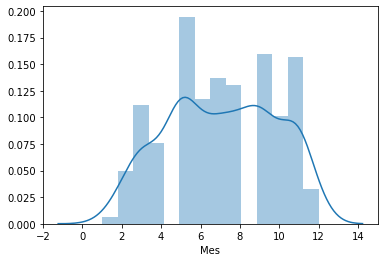

In [11]:
sns.distplot(RG19.Mes)